In [136]:
import pandas as pd
size = 1000000
business_json_path = 'yelp_academic_dataset_business.json'
df_b = pd.read_json(business_json_path, lines=True)
drop_columns = ['hours','review_count','latitude','attributes','type','name','full_address']
business= df_b.drop(drop_columns, axis=1)

size = 1000000
business_json_path2 = 'yelp_academic_dataset_review.json'
review00 = pd.read_json(business_json_path2, lines=True)
drop_columns2 = ['votes','user_id','date','type']
review = review00.drop(drop_columns2,axis=1)

full_dataset= pd.merge(business, review, on='business_id', how='inner',chunksize = 5)
full_dataset

,business_id,open,categories,city,neighborhoods,longitude,state,stars_x,review_id,stars_y,text
0,vcNAWiLM4dR7D2nwwJ7nCA,True,"[Doctors, Health & Medical]",Phoenix,[],-111.983758,AZ,3.5,15SdjuK7DmYqUAj6rjGowg,5,dr. goldberg offers everything i look for in a...
1,vcNAWiLM4dR7D2nwwJ7nCA,True,"[Doctors, Health & Medical]",Phoenix,[],-111.983758,AZ,3.5,RF6UnRTtG7tWMcrO2GEoAg,2,"Unfortunately, the frustration of being Dr. Go..."
2,vcNAWiLM4dR7D2nwwJ7nCA,True,"[Doctors, Health & Medical]",Phoenix,[],-111.983758,AZ,3.5,-TsVN230RCkLYKBeLsuz7A,4,Dr. Goldberg has been my doctor for years and ...
3,vcNAWiLM4dR7D2nwwJ7nCA,True,"[Doctors, Health & Medical]",Phoenix,[],-111.983758,AZ,3.5,dNocEAyUucjT371NNND41Q,4,Been going to Dr. Goldberg for over 10 years. ...
4,vcNAWiLM4dR7D2nwwJ7nCA,True,"[Doctors, Health & Medical]",Phoenix,[],-111.983758,AZ,3.5,ebcN2aqmNUuYNoyvQErgnA,4,Got a letter in the mail last week that said D...
...,...,...,...,...,...,...,...,...,...,...,...
1125453,BVxlrYWgmi-8TPGMe6CTpg,True,"[Food, Ethnic Food, Grocery, Specialty Food]",Edinburgh,"[Tollcross, Old Town]",-3.202529,EDH,3.5,eujuvkGqy2ssZ9zjdPJrMA,5,"Located at the bottom of Lauriston Place, this..."
1125454,BVxlrYWgmi-8TPGMe6CTpg,True,"[Food, Ethnic Food, Grocery, Specialty Food]",Edinburgh,"[Tollcross, Old Town]",-3.202529,EDH,3.5,vFA5KXUGEH-oMcM6WTC-8w,5,I love this place! I think the staff struggle ...
1125455,BVxlrYWgmi-8TPGMe6CTpg,True,"[Food, Ethnic Food, Grocery, Specialty Food]",Edinburgh,"[Tollcross, Old Town]",-3.202529,EDH,3.5,0sVK4VUxvj3cy78W0DlvWQ,3,Perfect little shop to go to if you want to pi...
1125456,BVxlrYWgmi-8TPGMe6CTpg,True,"[Food, Ethnic Food, Grocery, Specialty Food]",Edinburgh,"[Tollcross, Old Town]",-3.202529,EDH,3.5,Nx88b_tCsP7Oja3PvhR5tQ,4,I visit here once or twice a month. Just to ge...


{1: 110772, 2: 102737, 3: 163761, 4: 342143, 5: 406045}
dict_values([110772, 102737, 163761, 342143, 406045])
dict_keys([1, 2, 3, 4, 5])


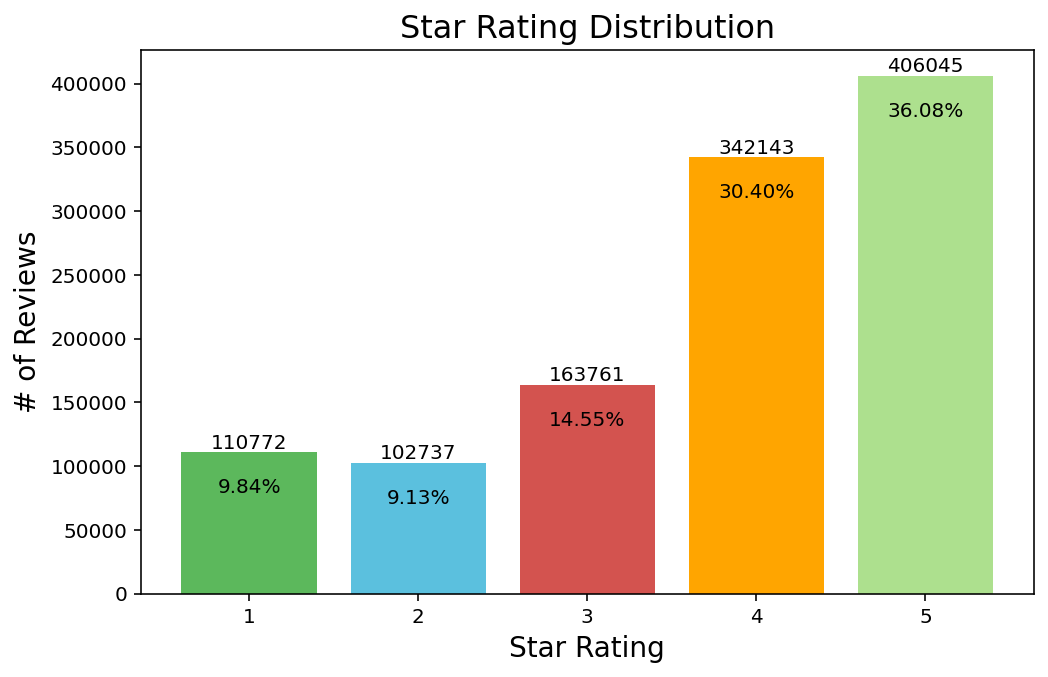

In [221]:
rating_list = list(full_dataset['stars_y'])
df = pd.DataFrame(full_dataset)
total = len(df['stars_y'])
import collections
counter = collections.Counter(rating_list)
counter = dict(sorted(counter.items()))
print(counter)
print(counter.values())
print(counter.keys())

import matplotlib.pyplot as plt
import numpy as np

colors_list = ['#5cb85c','#5bc0de','#d3534f','orange','#ade08e']
plt.figure(figsize=(8,5))
plt.bar(range(len(counter)), counter.values(), align='center', color = colors_list)
plt.xticks(range(len(counter)), counter.keys())
plt.title('Star Rating Distribution',fontsize = 16)
plt.xlabel('Star Rating',fontsize = 14 )
plt.ylabel('# of Reviews', fontsize = 14)
y = list(counter.values())
for i,v in enumerate(y):
    plt.text(range(len(counter))[i], v-20000,str('{:.2f}%'.format(100 * v/total)), ha='center', va='top')
    plt.text(range(len(counter))[i], v,str(v), ha='center', va='bottom')
plt.show()


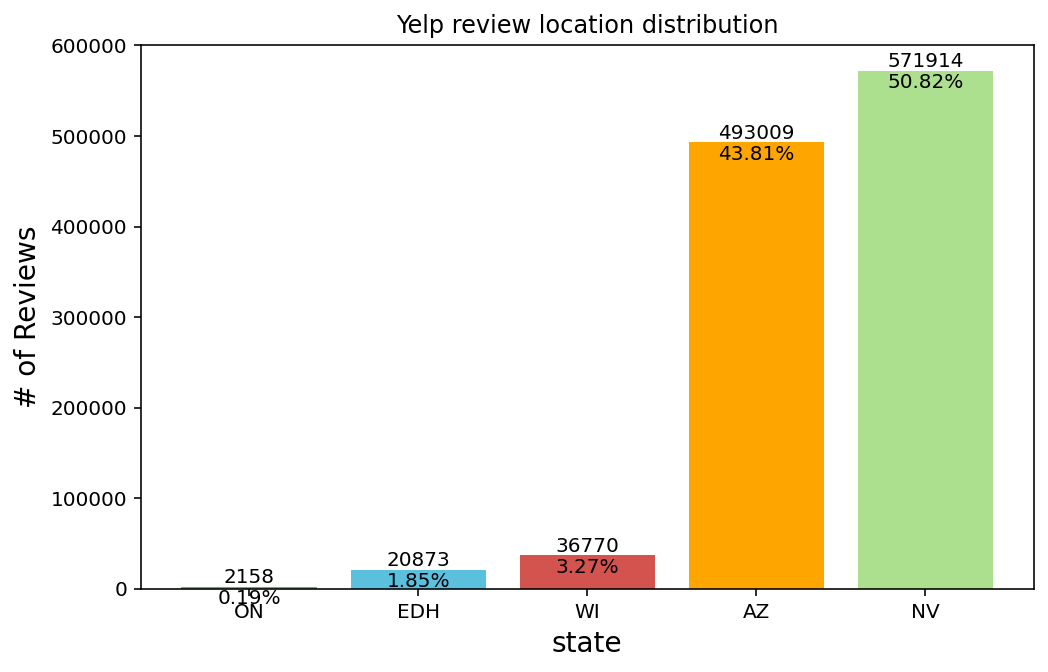

In [224]:
state00 = full_dataset['state'].value_counts(normalize=True)* 100
state = state00[:5].index.values
top_states = full_dataset[full_dataset['state'].isin(state)]
x=top_states['state'].value_counts()
x=x.sort_values(ascending=True)
plt.figure(figsize=(8,5))
plt.bar(x.index, x.values, align='center', color = colors_list)
plt.title("Yelp review location distribution")
plt.ylabel('# of Reviews', fontsize=14)
plt.xlabel('state', fontsize=14)
y2=x.values
for i,v in enumerate(y2):
    plt.text(range(len(counter))[i], v-2000,str('{:.2f}%'.format(100 * v/total)), ha='center', va='top')
    plt.text(range(len(counter))[i], v,str(v), ha='center', va='bottom')

In [275]:
reviews_sample = full_dataset.sample(n=1000, random_state=RANDOM_SEED).reset_index()
reviews_sample.head()
data = reviews_sample.text.values.tolist()

In [270]:
FILTERS_LIST = [lambda x: x.lower(), # lowercase  
                strip_tags, # remove tags
                strip_punctuation, # replace punctuation characters with spaces
                strip_multiple_whitespaces, # remove repeating whitespaces
                strip_numeric, # remove numbers
                gensim.parsing.preprocessing.remove_stopwords, # remove stopwords
                strip_short] # remove words less than minsize=3 characters long]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.parsing.preprocessing.preprocess_string(str(sentence), FILTERS_LIST))
        
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts, bigram_mod):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts, bigram_mod):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, nlp, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def preprocess(reviews_list):
    "Combination of the preprocessing functions above."
    data_words = list(sent_to_words(reviews_list))
    # print(data_words[:3])
    
    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
    # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    # Remove Stop Words
    data_words_nostops = remove_stopwords(data_words)
    # Form Bigrams
    data_words_bigrams = make_bigrams(data_words_nostops, bigram_mod)

    # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
    # python3 -m spacy download en
    nlp = spacy.load('en', disable=['parser', 'ner'])
    # Do lemmatization keeping only noun, adj, vb, adv
    data_lemmatized = lemmatization(data_words_bigrams, nlp, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    return data_lemmatized

In [272]:
preprocessed_texts = preprocess(data)

# create Dictionary and corpus
id2word = corpora.Dictionary(preprocessed_texts)
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in preprocessed_texts]

# View Human readable format of corpus (term-frequency)
# print(corpus[:1])
# [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [273]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=26,
                                           eval_every=10,
                                           chunksize=10,
                                           passes=10,
                                           alpha='auto',
                                           iterations=100,
                                           per_word_topics=True)

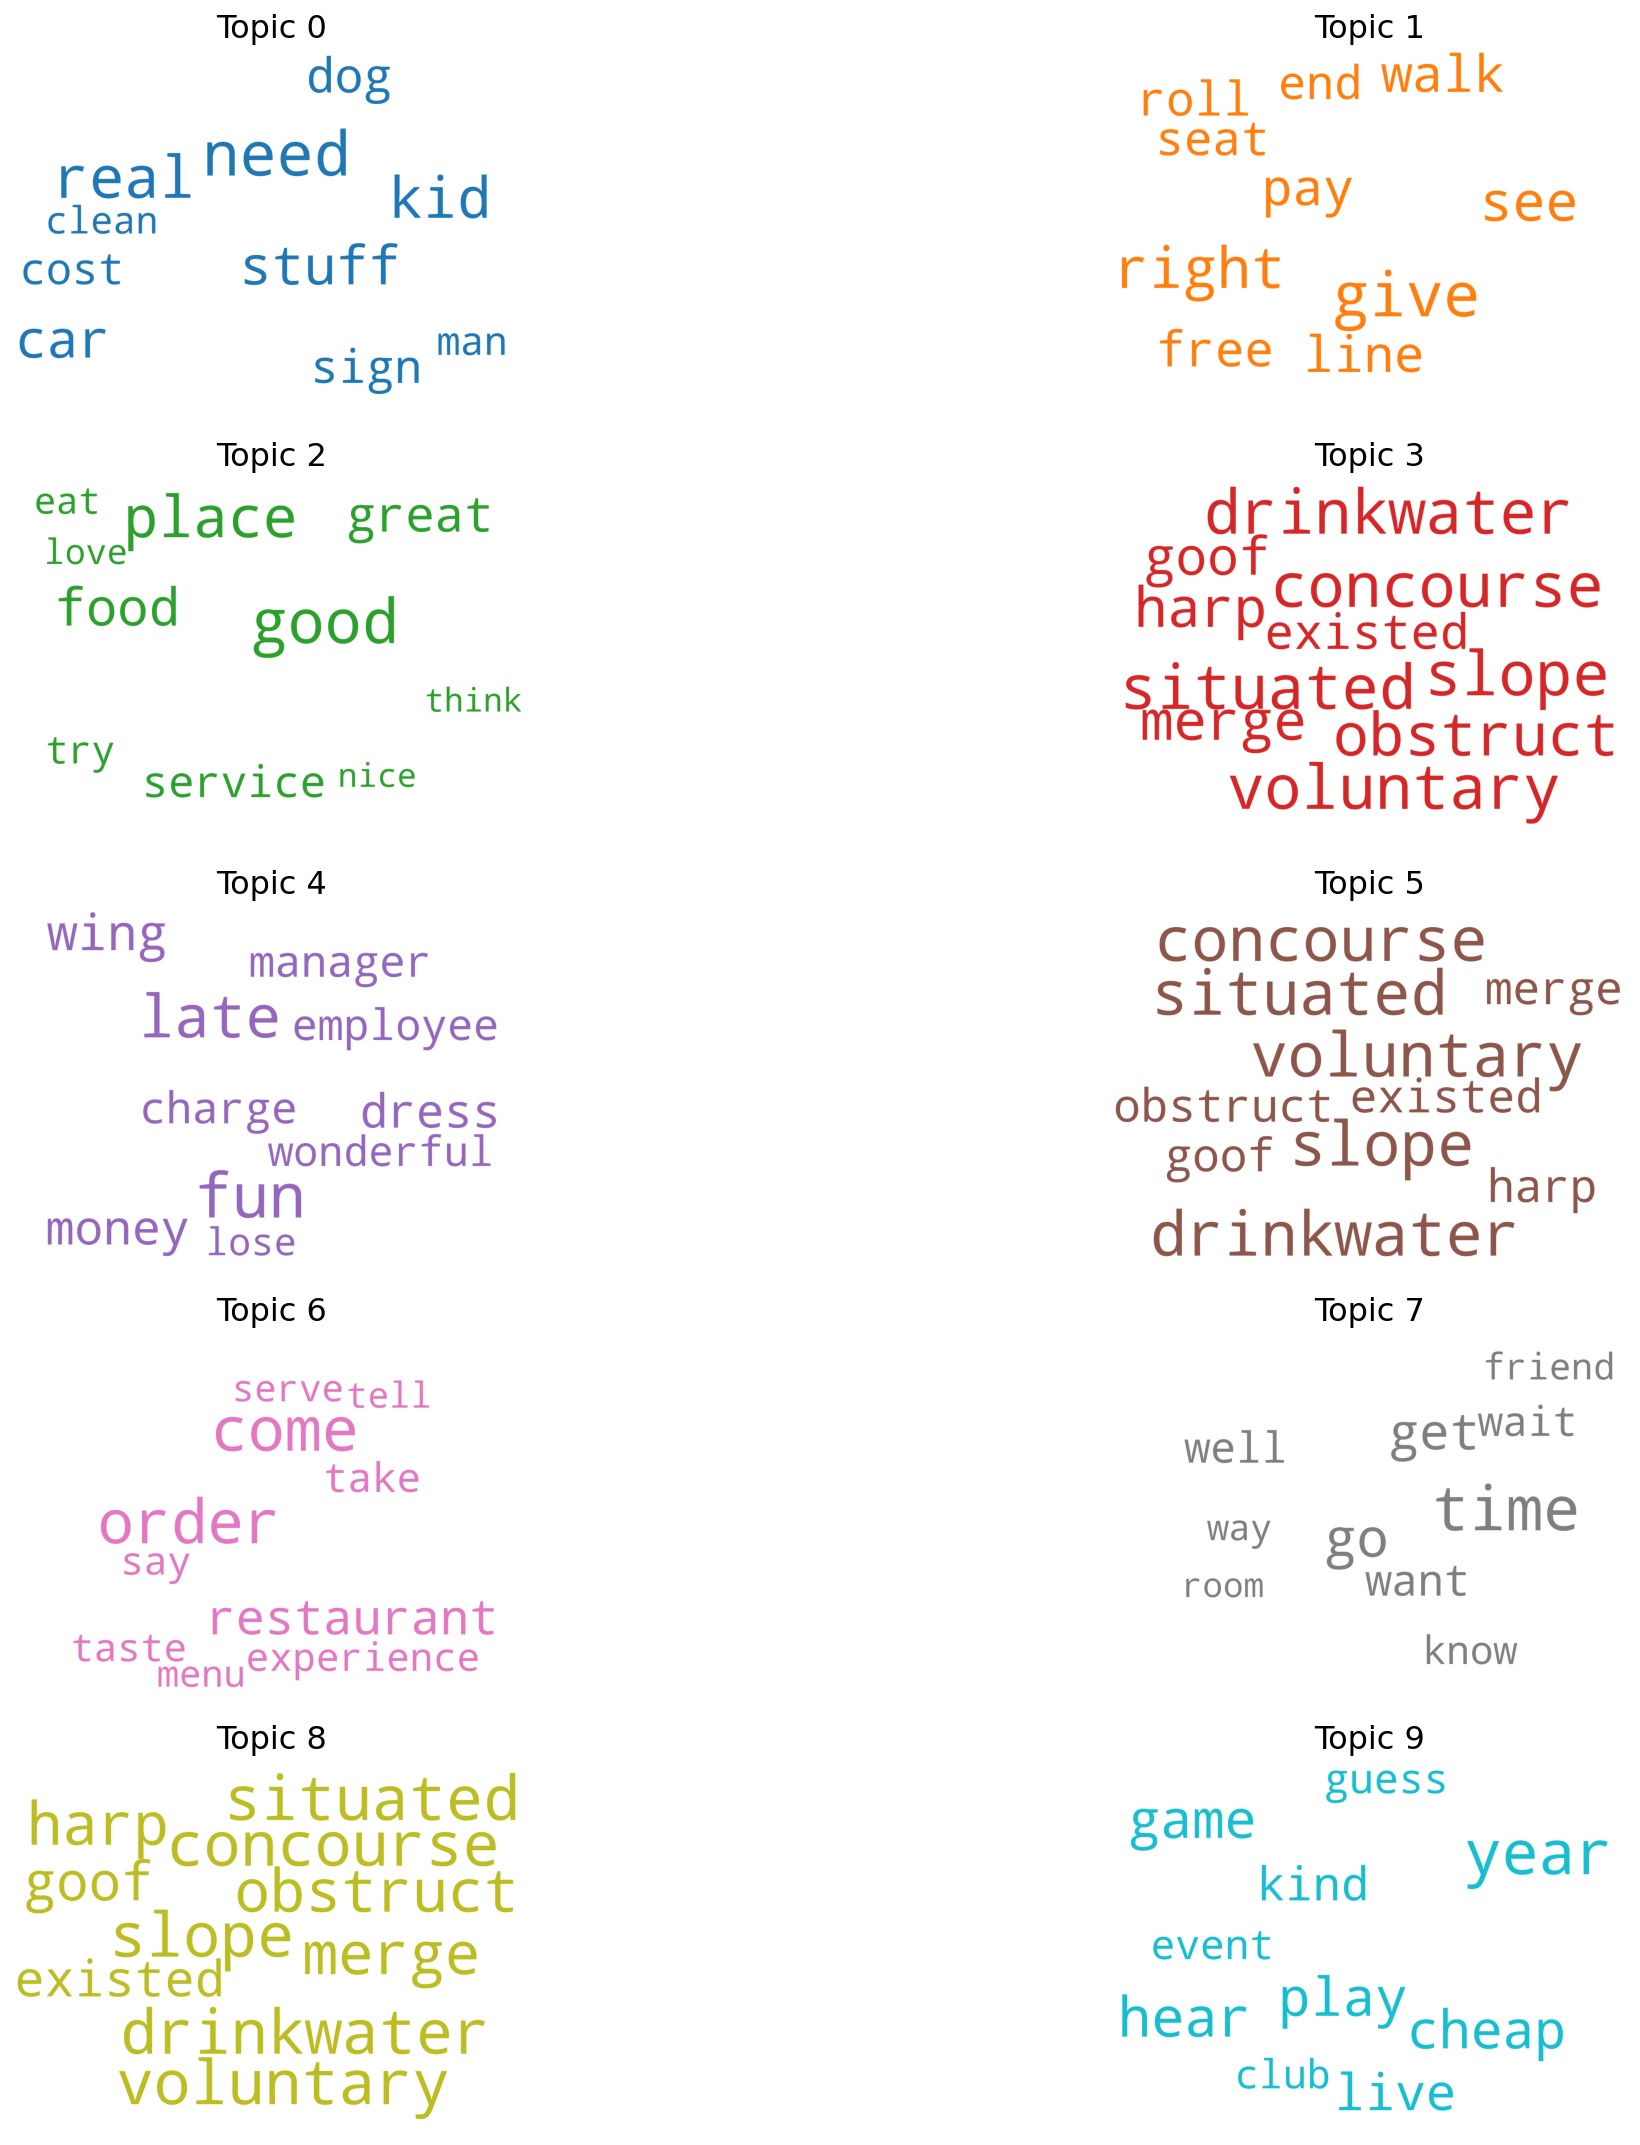

In [276]:
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(20,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

<ipython-input-277-c83f51c62375>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


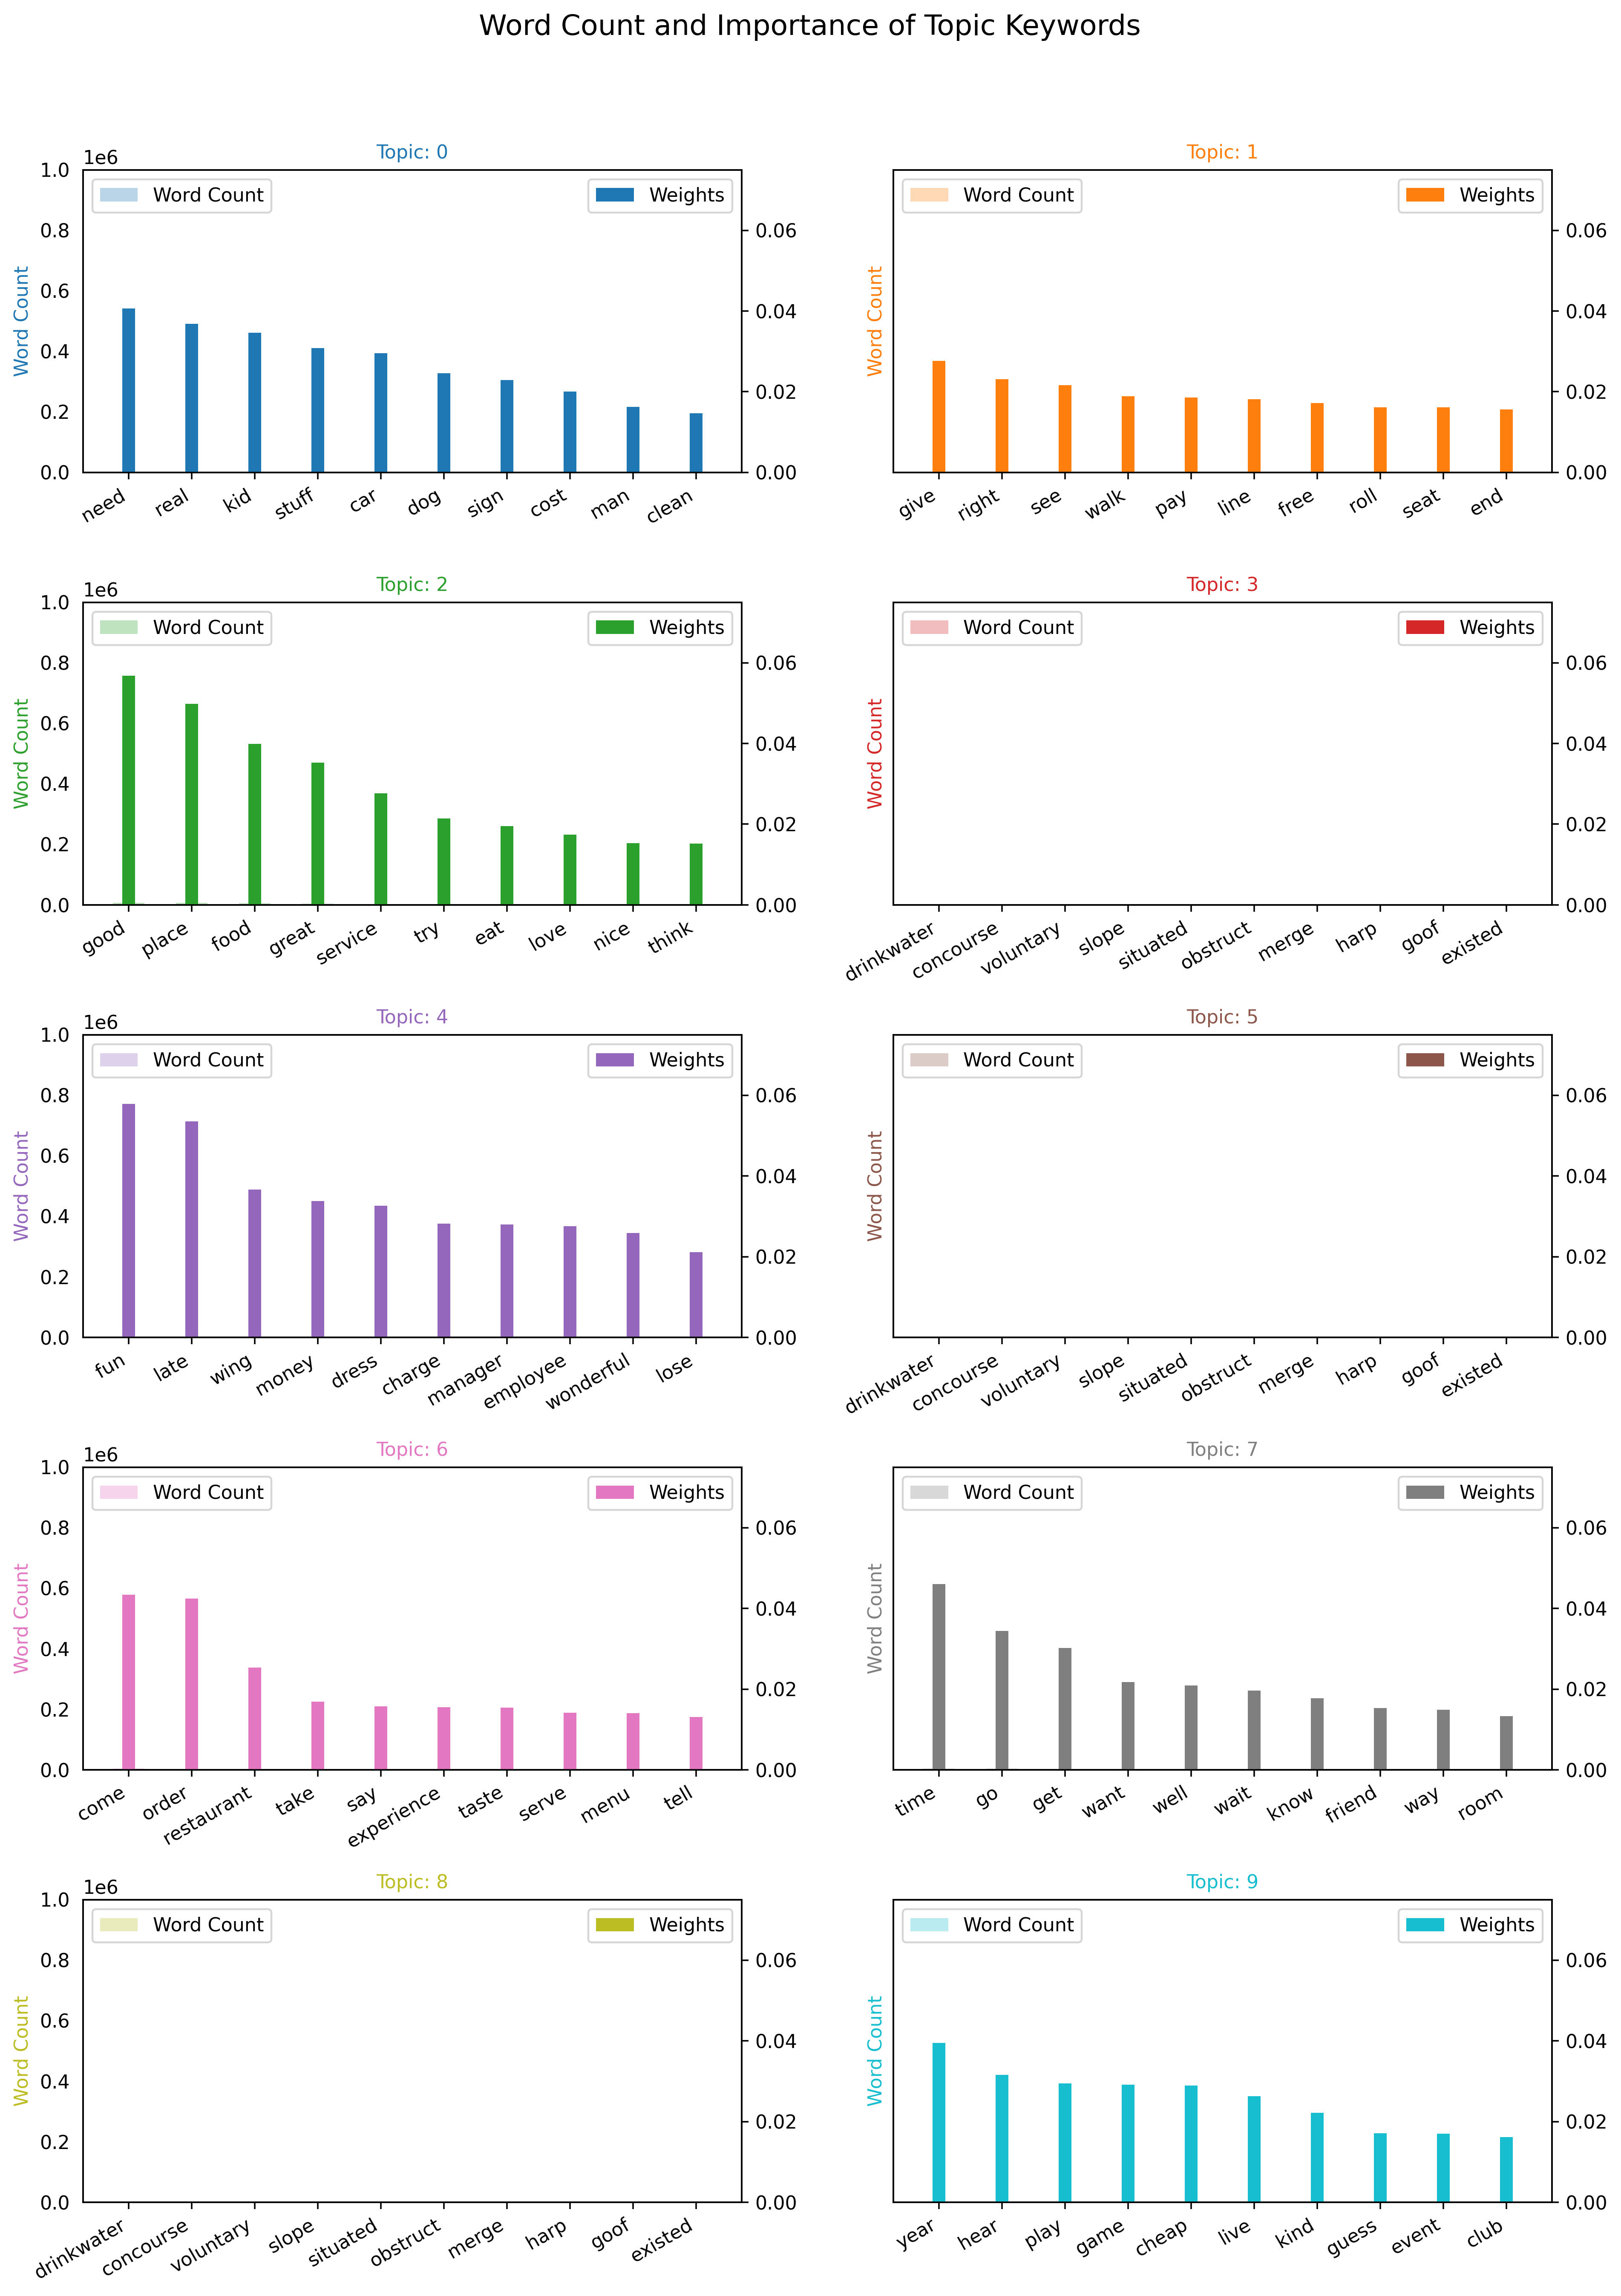

In [277]:
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in preprocessed_texts for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(12,16), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.075); ax.set_ylim(0, 1000000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=10)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=15, y=1.05)    
plt.show()

In [279]:

full_dataset['word_count']  = text_analytics.count_words(full_dataset['text'],delimiters = delimiters).dict_trim_by_keys(stopwords, exclude=True)

NameError: name 'text_analytics' is not defined